15-Plots in Plotly

In [30]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [31]:
# Import Dataset
df = sns.load_dataset('iris')
df.head()   

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1. Scatter Plot

In [32]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [33]:
fig1 = px.scatter(df, x= 'sepal_length', y = 'sepal_width', color = 'species')
fig1.show()
# save the plot
fig1.write_image('./output/fig1.png', scale=3)

# 2. Line PLot

In [34]:
fig2 = px.line(df, x= 'sepal_length', y = 'sepal_width', color = 'species')
fig2.show()

In [35]:
# Sort the data
df_line = df.sort_values(by='sepal_length', ascending=True)

fig2 = px.line(df_line, x= 'sepal_length', y = 'sepal_width', color = 'species')
fig2.show()
# save the plot
fig2.write_image('./output/fig2.png', scale=3)

# 3. Bar plot

In [36]:
fig3 = px.bar(df, x= 'species', y = 'sepal_width')
fig3.show()

In [37]:
# Groupby Values based o means
df_bar = df.groupby(['species']).mean().reset_index()
df_bar.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [38]:
fig3 = px.bar(df_bar, x= 'species', y = 'sepal_width')
fig3.show()

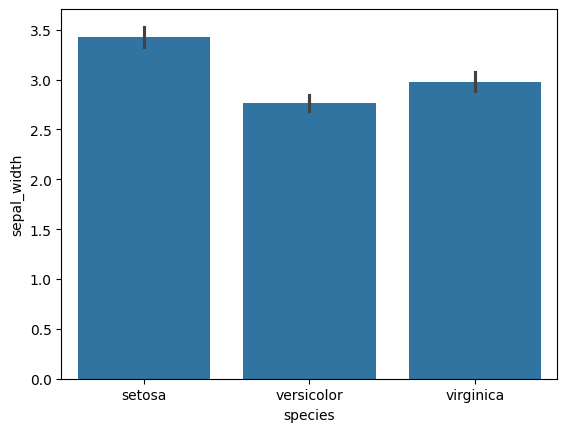

In [39]:
# Seaborn dosent need to make mean groups
sns.barplot(df, x= 'species', y = 'sepal_width')
# save the plot
plt.savefig('./output/fig3.png', dpi=300)

# Box PLot

In [40]:
fig4 = px.box(df, x = 'species', y = 'sepal_width', color = 'species') # beautifuly it by using color = 'species'
fig4.show()
# save the plot
fig4.write_image('./output/fig4.png', scale=3)

In [41]:
# Violin plot
fig5 = px.violin(df, x = 'species', y = 'sepal_width', color = 'species', box = True) # box = True to create box plot in it
fig5.show() 
# save the plot
fig5.write_image('./output/fig5.png', scale=3)

#6 Histogram 

In [42]:
# Histogram
fig6 = px.histogram(df, x = 'sepal_width') # histogram is created on one column
fig6.show()

In [43]:
# Histogram
fig6 = px.histogram(df, x = 'sepal_width', color='species') # histogram is created on one column and separate on color
fig6.show()
# save the plot
fig6.write_image('./output/fig6.png', scale=3)

# 7. PyChart

In [44]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [45]:
# Pychart
df_pie = df['species'].value_counts().reset_index()
df_pie.columns = ['species', 'count']
fig7  = px.pie(df_pie, values = 'count', names = 'species')
fig7.show()
# save the image
fig7.write_image('./output/fig7.png', scale=3)

# 8. 3D Scatter PLot

In [46]:
# 3D Scatter PLot
fig8 = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color = 'species')
fig8.show()
# save the plot
fig8.write_html('./output/fig8.htnl')

# 9.  Area Chart

In [47]:
# area chart
df_area = df.sort_values(by=['sepal_length'], ascending=True) 
fig_9 = px.area(df_area, x = 'sepal_length', y = 'sepal_width', color = 'species')
fig_9.show()

# save the plot
fig_9.write_image('./output/fig9.png', scale=3) 

# 10. Bubble Chart

In [48]:
fig_10 = px.scatter(df, x='sepal_length', y ='sepal_width', size = 'petal_length', color='species')
fig_10.show()
# save the plot
fig_10.write_image('./output/fig10.png', scale=3) 

# 11 Sunburst Chart


In [54]:
df_sunburst = df.groupby(['species', 'petal_width']).size().reset_index(name='counts')

fig_11 = px.sunburst(df_sunburst, path=['species', 'petal_width'], values='counts')
fig_11.show()
# save the plot
fig_11.write_image('./output/fig11.png', scale=3) 
fig_9.write_html('./output/fig11.html',) 

# 12 Paralel Co-ordinate

In [65]:
df['species_id']  =df['species'].astype('category').cat.codes # Convert categorical to numerical factor or categorical coding
# 12 Parallel Co-ordinate
fig12 = px.parallel_coordinates(df, color = 'species_id', labels={"species_id": "species"}, color_continuous_scale=px.colors.diverging.Tealrose)
fig12.show() 
# save the plot in html
fig12.write_html('./output/fig12.html')
# save in imge
fig12.write_image('./output/fig12.png', scale =3 ) 

# 13. Desity Contour Plot


In [67]:
fig13  = px.density_contour(df, x='sepal_length', y='sepal_width', color='species')
fig13.show()
# save this plot
fig13.write_image('./output/fig13.png', scale=3)

# 14. Ternary PLot

In [69]:
# Ternary Chart helpful in finding outliers
fig14 = px.scatter_ternary(df, a='sepal_length', b='sepal_width', c='petal_width', color='species')
fig14.show()
# save the plot
fig14.write_image('./output/fig14.png', scale=3)

# 15. Polar Chart (Radar Chart)

In [72]:
# Polar Chart
df_radar = df.groupby(['species']).mean().reset_index()
fig15 = px.line_polar(df_radar, r='sepal_length', theta='species', line_close=True)
fig15.show()
# save the plot
fig15.write_image('./output/fig15.png', scale=3)